In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv("breast-cancer.csv")

In [4]:
df.drop(columns=['id'], inplace=True) #id is not useful 

In [5]:
print("Missing Values per Column:\n", df.isnull().sum()) #checking missing values

Missing Values per Column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [13]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Categorical Columns: []


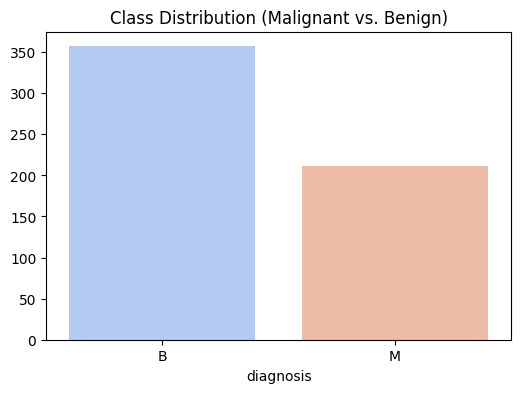

In [8]:
diagnosis_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette='coolwarm')
plt.title("Class Distribution (Malignant vs. Benign)")
plt.show()

In [10]:
df.duplicated().sum()

np.int64(0)

FEATURE ENGINEERING

In [11]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

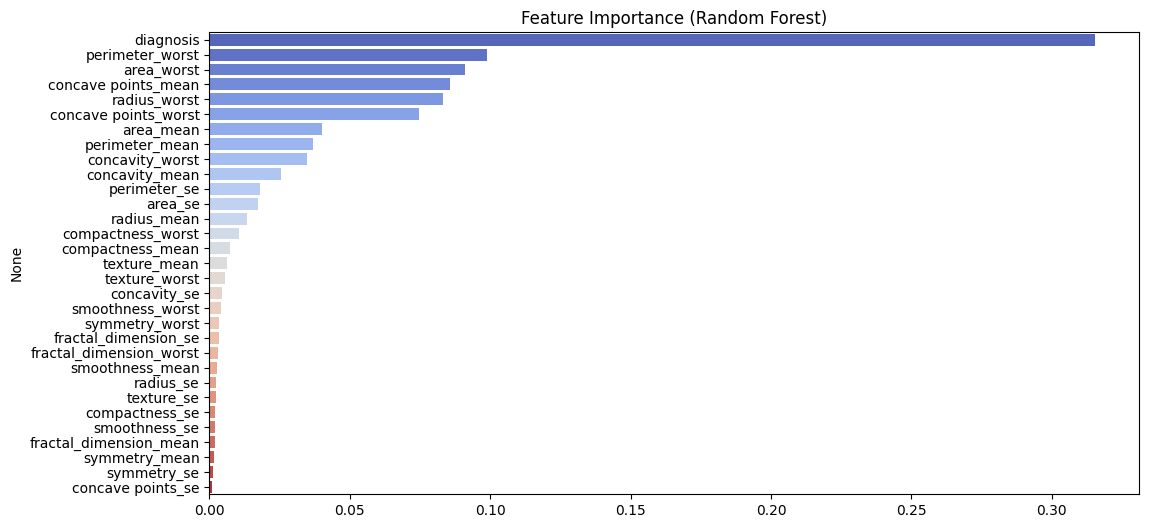

In [17]:
# Feature Importance using Random Forest
X = df[numerical_cols]
y = df['diagnosis']
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)
feature_importances = pd.Series(clf.feature_importances_, index=numerical_cols).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='coolwarm')
plt.title("Feature Importance (Random Forest)")
plt.show()


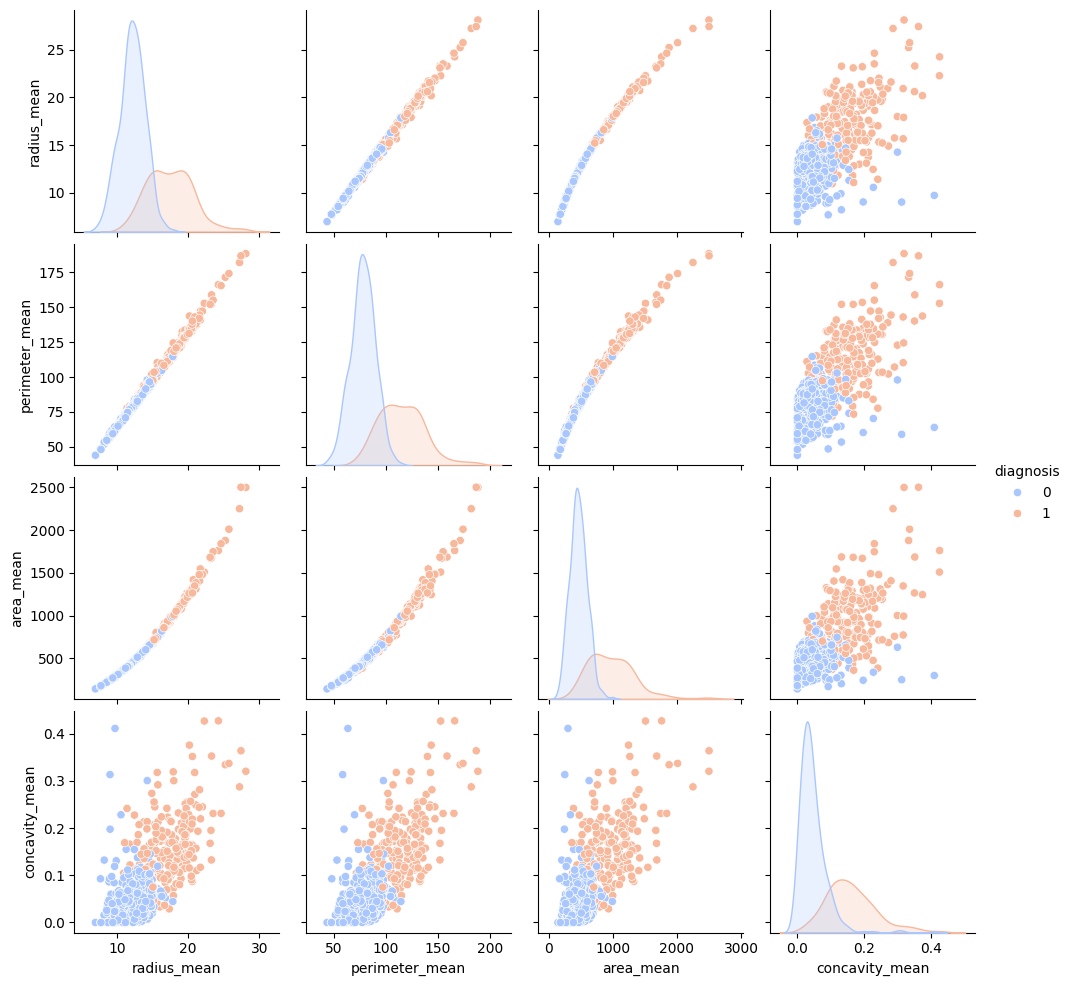

In [16]:
# Pairplot of Highly Correlated Features
sns.pairplot(df, vars=['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean'], hue='diagnosis', palette='coolwarm')
plt.show()

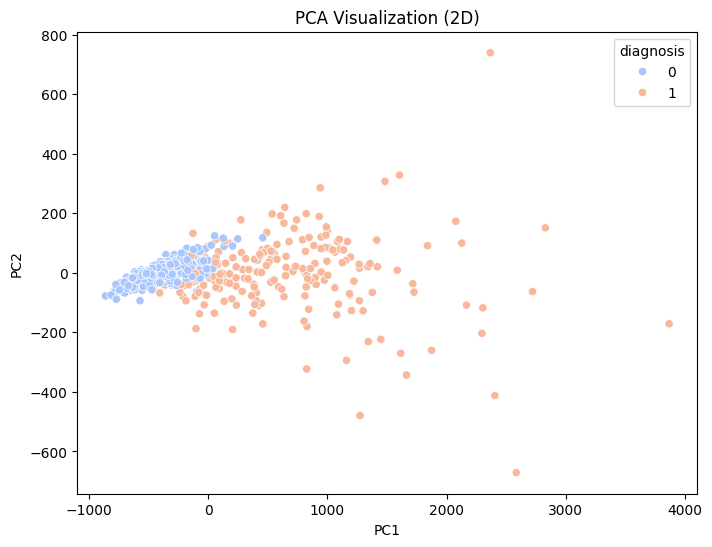

In [18]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['diagnosis'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['diagnosis'], palette='coolwarm')
plt.title("PCA Visualization (2D)")
plt.show()

ValueError: num must be an integer with 1 <= num <= 30, not 31

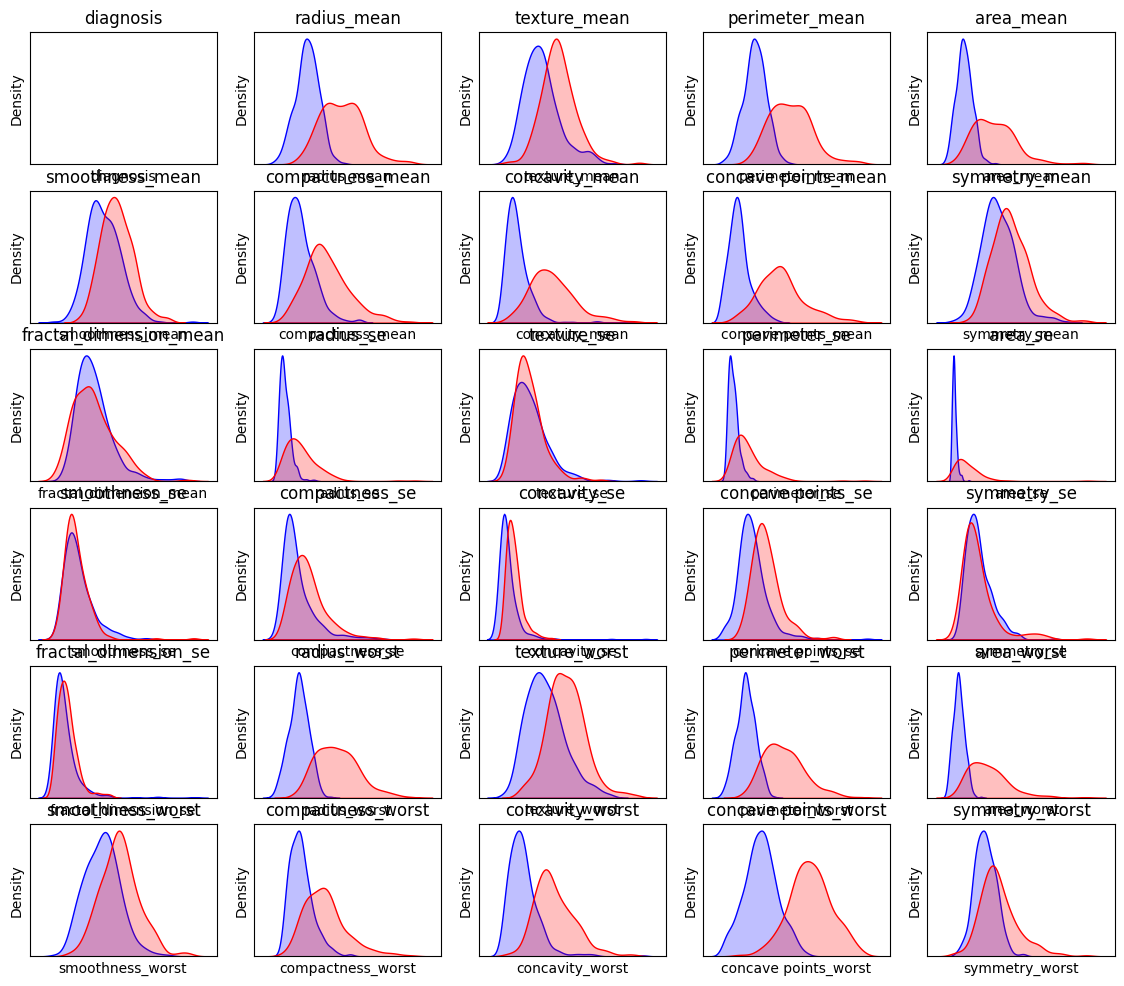

In [19]:
# KDE Plots for All Numerical Columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 5, i + 1)
    sns.kdeplot(df[df['diagnosis'] == 0][col], label='Benign', shade=True, color='blue')
    sns.kdeplot(df[df['diagnosis'] == 1][col], label='Malignant', shade=True, color='red')
    plt.title(col)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [20]:
# Statistical Tests (T-test)
t_stat, p_value = ttest_ind(df[df['diagnosis'] == 0]['radius_mean'], df[df['diagnosis'] == 1]['radius_mean'])
print("T-test for Radius Mean: t-statistic =", t_stat, "p-value =", p_value)

T-test for Radius Mean: t-statistic = -25.435821610057054 p-value = 8.465940572262422e-96


In [21]:
# Machine Learning Classification Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
# Model Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Accuracy: 1.0


In [23]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

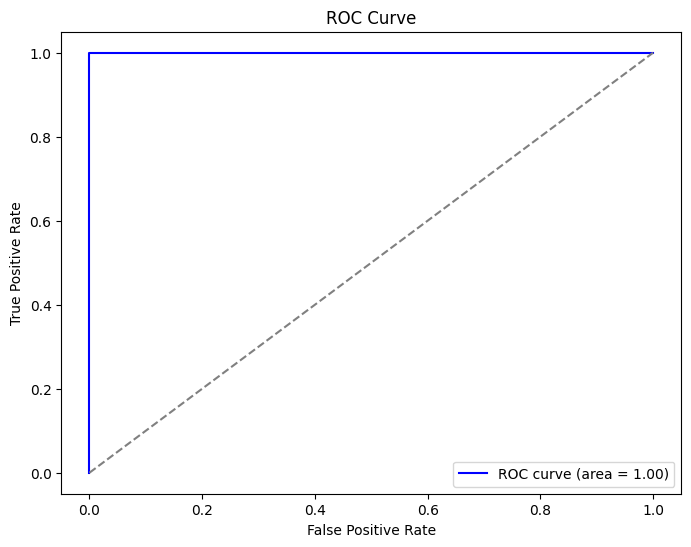

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()